# TMDB Movie Analysis: Exploring the Most Popular Movies, Highest Grossing Movies, and More!

## Introduction

How can we determine whether a specific movie is likely to achieve success at the Box Office or face disappointment?

Could it be the **high-profile cast members** ("Tom Hanks", "Chris Pratt")? Maybe the credit goes to the **innovative director** ("J.J. Abrams", "James Wan")? Or does the movie's **genre** (Action, Adventure, Thriller) play a significant role?

In this examination, our aim is to explore the TMDB movie dataset, extracting insights and satisfying our curiosity.

The dataset originates from [Kaggle: 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and encompasses data from 10,867 films sourced from The Movie Database (TMDb), covering attributes such as popularity, revenue, budget, cast, and genres.

_(This analysis constitutes a case study within the Udacity Data Analyst Nanodegree Program.)_

## Table of Contents

<ul>
<li><a href="#ask questions">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


***
<a id='ask questions'></a>
## Asking Questions

Based on dataset, we are interested to know:

- Q1: Does having a higher budget results in a higher revenue and profit?
- Q2: Which genres are associated with high popularity?
- Q3: Which director produces the highest revenue movies?
- Q4: Which actor is associated with higher popularity and revenue profit?
- Q5: Which year produced movies with highest grossing revenue?

***

<a id='wrangling'></a>
## Data Wrangling


We'll begin by setting up the environment and loading the dataset. After that, we'll assess the dataset's condition. Following this, we'll proceed to clean and process the data to make it suitable for analysis.

### Preparing the Environment

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV
df = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Project 2 - TMDB Movie/tmdb-movies.csv')

### Assess Data

In this step, we view the dataset and get basic information.

In [2]:
# View first 3 rows
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   06/09/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  

[3 rows x 21 columns]

In [3]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Handle Duplicates

In [4]:
# Check for duplicates
df.duplicated().sum()

1

As there is only 1 duplicated row, we drop the row.

In [5]:
# Drop row and set inplace to True to reflect changes in dataset
df.drop_duplicates(inplace=True)

### Handle Missing Values

Utilizing percentages to identify missing values provides a more transparent depiction of the dataset's incomplete data points.

In [6]:
# Find percentage of null values
df.isnull().sum()/len(df)*100

id                       0.000000
imdb_id                  0.092039
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699494
homepage                72.977451
director                 0.404970
tagline                 25.991717
keywords                13.741371
overview                 0.036815
runtime                  0.000000
genres                   0.211689
production_companies     9.479982
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

We'll exclude fields such as homepage, tagline, keywords, and any other irrelevant attributes that are not within the scope of our analysis.

### Drop Columns

In [7]:
# Drop columns
df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date',
         'vote_count','budget_adj','revenue_adj'], axis=1, inplace=True)

In [8]:
# Confirm that colummns are dropped
df.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_average  \
0      124  Action|Adventure|Science Fiction|Thriller           6.5   
1      120  Action|Adventure|Science Fiction|Thriller           7.1   
2      119         Adventure|Science Fiction|Thriller           6.3   
3      136   Action|Adventure|Science Fiction|Fantasy           7.5   
4      137                      Action|Crime|Thriller           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

### Create Calculated Field

In [9]:
# Create a column for profit and profit margin
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

In [10]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

       vote_average  release_year        profit  profit_margin  
count  10865.000000  10865.000000  1.086500e+04    6164.000000  
mean       5.975012   2001.321859  2.520261e+07           -inf  
std        0.935138     12.813260  9.659103e+07            NaN  
min        1.500000   1960.000000 -4.139124e+08           -inf  
25%        5.400000   1995.000000  0.000000e+00    -618.520453  
50%        6.000000   2006.000000  0.000000e+00      47.321674  
75%        6.600000   2011.000000  9.092453e+06      85.279760  
max        9.200000   2015.000000  2.544506e+09     100.000000

***

<a id='eda'></a>
## Exploratory Data Analysis

**Q1: Does a higher budget results in higher revenue and profit?**

In [11]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

       vote_average  release_year        profit  profit_margin  
count  10865.000000  10865.000000  1.086500e+04    6164.000000  
mean       5.975012   2001.321859  2.520261e+07           -inf  
std        0.935138     12.813260  9.659103e+07            NaN  
min        1.500000   1960.000000 -4.139124e+08           -inf  
25%        5.400000   1995.000000  0.000000e+00    -618.520453  
50%        6.000000   2006.000000  0.000000e+00      47.321674  
75%        6.600000   2011.000000  9.092453e+06      85.279760  
max        9.200000   2015.000000  2.544506e+09     100.000000

We've noticed an anomaly in the data. Over 50% of the revenue values are recorded as 0. Moreover, in the profit column, the minimum value is negative. Similar to revenue, around half of the entries show a profit of $0.

Examining the newly introduced "profit_margin" column, we observe that only 6,164 rows (57%) possess profit margins, indicating that the remaining rows either have a budget or revenue of $0.

To proceed, we'll generate a subset where the budget exceeds 0.

In [12]:
budget = df.query('budget > 0')
budget.describe()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


id   popularity        budget       revenue      runtime  \
count    5169.000000  5169.000000  5.169000e+03  5.169000e+03  5169.000000   
mean    45513.725479     0.992400  3.073958e+07  8.029101e+07   107.096150   
std     72730.345078     1.329262  3.890441e+07  1.594865e+08    22.810038   
min         5.000000     0.001117  1.000000e+00  0.000000e+00     0.000000   
25%      8840.000000     0.347958  6.000000e+06  0.000000e+00    93.000000   
50%     13008.000000     0.624024  1.700000e+07  2.100156e+07   103.000000   
75%     44943.000000     1.152417  4.000000e+07  8.945676e+07   117.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   540.000000   

       vote_average  release_year        profit  profit_margin  
count   5169.000000   5169.000000  5.169000e+03    5169.000000  
mean       6.032308   2001.251112  4.955143e+07           -inf  
std        0.884125     11.776443  1.351328e+08            NaN  
min        1.500000   1960.000000 -4.139124e+08           -inf  
25%        5.500000   1996.000000 -6.597680e+06            NaN  
50%        6.100000   2005.000000  2.507368e+06      16.956397  
75%        6.600000   2010.000000  5.279686e+07      69.288745  
max        8.400000   2015.000000  2.544506e+09      99.999902

This provides a more effective representation for analyzing revenue and profit.

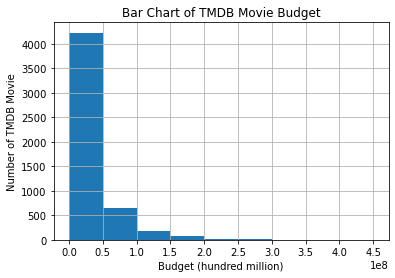

In [46]:
# Budget
x_ticks = np.arange(1.000000e+00,5.000000e+08,5.000000e+07)

budget['budget'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Budget")
plt.xlabel("Budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

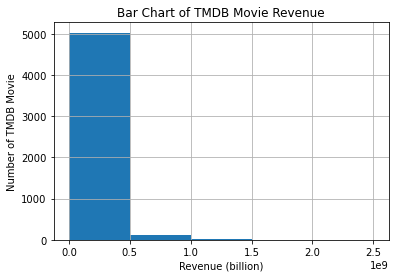

In [14]:
# Revenue
x_ticks = np.arange(0.000000e+00,3.000000e+09,5.000000e+08)

budget['revenue'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Revenue")
plt.xlabel("Revenue (billion)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

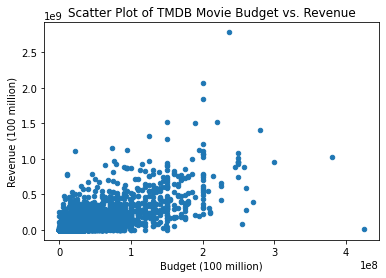

In [15]:
# Budget vs Revenue
budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)");

**In general, movies with a higher budget results in a higher revenue.**

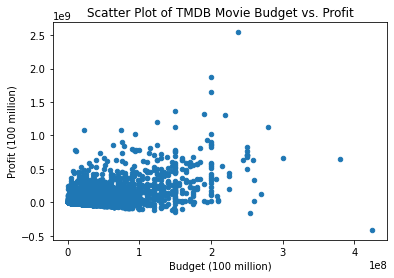

In [16]:
# Budget vs Profit
budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)");

**In general, movies with a higher budget results in a higher profit.**


We'll apply a filter to include budgets of USD 100 million or more.

In [17]:
blockbuster = budget.query('budget > 1.000000e+08')
blockbuster.describe()

id  popularity        budget       revenue     runtime  \
count     282.000000  282.000000  2.820000e+02  2.820000e+02  282.000000   
mean    46172.187943    3.300546  1.544628e+08  4.778548e+08  123.031915   
std     62780.785336    3.535419  4.436161e+07  3.509745e+08   33.718360   
min        22.000000    0.157586  1.020000e+08  0.000000e+00   76.000000   
25%      2030.000000    1.507585  1.250000e+08  2.453954e+08  102.000000   
50%     14515.000000    2.437016  1.500000e+08  3.786594e+08  121.000000   
75%     68723.250000    3.964661  1.750000e+08  6.303428e+08  137.000000   
max    417859.000000   32.985763  4.250000e+08  2.781506e+09  540.000000   

       vote_average  release_year        profit  profit_margin  
count    282.000000    282.000000  2.820000e+02     282.000000  
mean       6.345035   2008.485816  3.233920e+08           -inf  
std        0.736825      4.961935  3.362143e+08            NaN  
min        4.400000   1994.000000 -4.139124e+08           -inf  
25%        5.800000   2005.000000  1.089377e+08      44.387952  
50%        6.350000   2010.000000  2.417142e+08      63.528171  
75%        6.800000   2013.000000  4.886075e+08      75.959035  
max        8.100000   2015.000000  2.544506e+09      91.479435

In [18]:
blockbuster.shape

(282, 13)

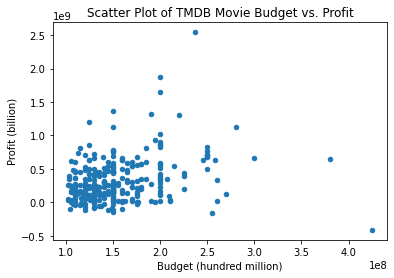

In [19]:
blockbuster.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit (billion)");

**There is a noticeable increase in the number of outliers when considering blockbuster movies with larger budgets. However, these outliers don't always correspond to high profits.**

Let's determine the top 10 movies with the highest budgets.

In [20]:
# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies
blockbuster_grouped = blockbuster.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

budget     revenue      profit
original_title                                                                
The Warrior's Way                            425000000    11087569  -413912431
Pirates of the Caribbean: On Stranger Tides  380000000  1021683000   641683000
Pirates of the Caribbean: At World's End     300000000   961000000   661000000
Godzilla                                     290000000   908090363   618090363
Avengers: Age of Ultron                      280000000  1405035767  1125035767
Superman Returns                             270000000   391081192   121081192
Tangled                                      260000000   591794936   331794936
John Carter                                  260000000   284139100    24139100
Spider-Man 3                                 258000000   890871626   632871626
The Lone Ranger                              255000000    89289910  -165710090

Even with a budget exceeding a billion dollars, movies can still incur losses. Examples such as "The Warrior's Way" and "The Lone Ranger" experienced losses, with the former facing a substantial loss of USD 400 million.

***

**Q2: Which genres are associated with high popularity?**

Prior to initiating our analysis, it's essential to grasp the concept of popularity and its method of computation.

#### Popularity Calculation on TMDB

At TMDB, the popularity metric is determined through the evaluation of **Movies**, **TV Shows**, and **People**. This metric takes into account the quantity of votes and views, as well as the number of users who have denoted it as a "favorite" or incorporated it into their "watchlist".

Source: [https://developers.themoviedb.org/3/getting-started/popularity](https://developers.themoviedb.org/3/getting-started/popularity)


In [21]:
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

It's intriguing to observe that 75% of the data exhibits a popularity score of 0.71, while at the other end of the spectrum, there's a considerably higher score of 32.98—defying the expectation of a typical popularity scale that would peak at 10.

This prompts the question: Why does this pattern emerge?

After conducting some research, I stumbled upon an explanation in a TMDB forum post by Travis Bell, a staff member, who [provided insights](https://www.themoviedb.org/talk/5141d424760ee34da71431b0) into the calculation of popularity:

> ### Upper (referring to the maximum value of the popularity metric) no, this is the same as before. Lower, 0. It can be anywhere from 0 to essentially infinity.

What he's conveying is that "the popularity score begins from 0 and extends to infinity."

This wide range can indeed present measurement challenges. To establish a reference point, we'll calculate the average popularity and utilize it as our benchmark.


In [22]:
df['popularity'].mean()

0.6464455549010583

As the popularity genres for each movie are contained within a single cell and separated by "|", our initial step will involve performing the necessary splitting operation.

In [23]:
df['genres'] = df['genres'].str.split("|") 
df.head(1)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                          genres  vote_average  \
0      124  [Action, Adventure, Science Fiction, Thriller]           6.5   

   release_year      profit  profit_margin  
0          2015  1363528810      90.089386

In [24]:
genre = df.explode('genres')
genre.head(3)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   
0  135397   32.985763  150000000  1513528810  Jurassic World   
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime           genres  vote_average  release_year      profit  \
0      124           Action           6.5          2015  1363528810   
0      124        Adventure           6.5          2015  1363528810   
0      124  Science Fiction           6.5          2015  1363528810   

   profit_margin  
0      90.089386  
0      90.089386  
0      90.089386

In [25]:
genre['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

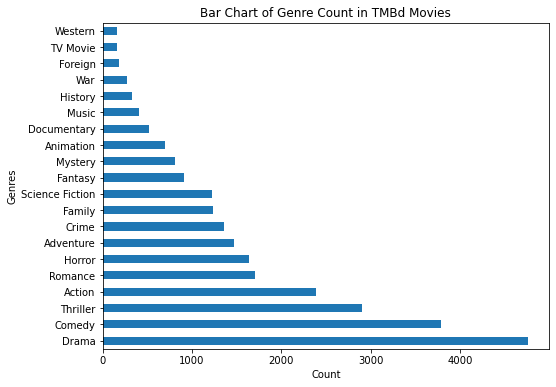

In [26]:
plt.figure(figsize=[8,6])
genre['genres'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count");

**The genres with the highest frequency are Drama, Comedy, and Thriller. Does this imply that they are the most popular?**


In [27]:
genre_mean = genre.groupby('genres')[['popularity','revenue','profit']].mean().sort_values('popularity', ascending=False)
genre_mean.iloc[:10,:].query("popularity > 0.6464455549010583")

popularity       revenue        profit
genres                                                 
Adventure          1.154259  1.131379e+08  7.559417e+07
Science Fiction    1.001548  7.014056e+07  4.516788e+07
Fantasy            0.992840  9.631366e+07  6.370107e+07
Action             0.926274  7.279473e+07  4.506691e+07
Animation          0.852182  7.525606e+07  5.209628e+07
Family             0.786668  7.243318e+07  4.907384e+07
Crime              0.744930  4.236866e+07  2.470486e+07
Thriller           0.741563  4.172842e+07  2.452072e+07
War                0.727683  4.760518e+07  2.671330e+07
Mystery            0.690012  4.021757e+07  2.409830e+07

Indeed, the evidence suggests otherwise. In this context, a distinctly different set of popular genres emerges.

**Adventure, Science Fiction, and Fantasy stand out as the most favored genres.**


***

**Q3: Which director produces the highest revenue movies?**


In [28]:
df['director'].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [29]:
df['director'] = df['director'].str.split("|") 
df.head(1)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast           director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  [Colin Trevorrow]   

   runtime                                          genres  vote_average  \
0      124  [Action, Adventure, Science Fiction, Thriller]           6.5   

   release_year      profit  profit_margin  
0          2015  1363528810      90.089386

In [30]:
directors_df = df.explode('director')
directors_df.head(1)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                          genres  vote_average  \
0      124  [Action, Adventure, Science Fiction, Thriller]           6.5   

   release_year      profit  profit_margin  
0          2015  1363528810      90.089386

In [31]:
directors_df['director'].value_counts()

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
                     ..
Mike Maguire          1
Tom Kuntz             1
John Simpson          1
Simon Hunter          1
Harold P. Warren      1
Name: director, Length: 5362, dtype: int64

In [32]:
directors_df.groupby('director')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head(5)

revenue        profit
director                                    
Pierre Coffin     8.903356e+08  8.173356e+08
David Yates       8.308591e+08  6.758591e+08
Colin Trevorrow   7.587683e+08  6.833933e+08
Robert Stromberg  7.584104e+08  5.784104e+08
Lee Unkrich       7.439073e+08  6.191573e+08

In [33]:
directors_df.groupby('director')[['revenue','profit']].mean().sort_values('profit', ascending=False).head(5)

revenue        profit
director                                    
Pierre Coffin     8.903356e+08  8.173356e+08
Colin Trevorrow   7.587683e+08  6.833933e+08
David Yates       8.308591e+08  6.758591e+08
Lee Unkrich       7.439073e+08  6.191573e+08
Robert Stromberg  7.584104e+08  5.784104e+08

**On average, the director associated with the highest revenue and profit-producing movie is Pierre Coffin.**

Let's now investigate the movies that have been produced by Pierre Coffin.


In [34]:
directors_df.query('director == "Pierre Coffin"').sort_values('profit', ascending=False).head(3)

id  popularity    budget     revenue   original_title  \
8     211672    7.404165  74000000  1156730962          Minions   
5434   93456    3.928789  76000000   970761885  Despicable Me 2   
1924   20352    3.791881  69000000   543513985    Despicable Me   

                                                   cast       director  \
8     Sandra Bullock|Jon Hamm|Michael Keaton|Allison...  Pierre Coffin   
5434  Steve Carell|Kristen Wiig|Benjamin Bratt|Miran...  Pierre Coffin   
1924  Steve Carell|Jason Segel|Russell Brand|Julie A...  Pierre Coffin   

      runtime                                  genres  vote_average  \
8          91  [Family, Animation, Adventure, Comedy]           6.5   
5434       98             [Animation, Comedy, Family]           7.0   
1924       95             [Action, Animation, Family]           7.1   

      release_year      profit  profit_margin  
8             2015  1082730962      93.602661  
5434          2013   894761885      92.171098  
1924          2010   474513985      87.304834

**As anticipated, the Despicable Me movie series holds its ground as a cherished favorite among both children and adults.**

***

**Q4: Which actor is associated with higher popularity, revenue and profit?**

In [35]:
df['cast'].value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
George Carlin                                                                     3
Pierre Coffin                                                                     3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

In [36]:
df['cast'].describe()

count          10789
unique         10719
top       Louis C.K.
freq               6
Name: cast, dtype: object

In [37]:
df['cast'] = df['cast'].astype(str)
df.head(1)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast           director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  [Colin Trevorrow]   

   runtime                                          genres  vote_average  \
0      124  [Action, Adventure, Science Fiction, Thriller]           6.5   

   release_year      profit  profit_margin  
0          2015  1363528810      90.089386

In [38]:
df['cast'] = df['cast'].str.split("|")
df.head(1)

id  popularity     budget     revenue  original_title  \
0  135397   32.985763  150000000  1513528810  Jurassic World   

                                                cast           director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  [Colin Trevorrow]   

   runtime                                          genres  vote_average  \
0      124  [Action, Adventure, Science Fiction, Thriller]           6.5   

   release_year      profit  profit_margin  
0          2015  1363528810      90.089386

In [39]:
cast_df = df.explode('cast')
cast_df.head(1)

id  popularity     budget     revenue  original_title         cast  \
0  135397   32.985763  150000000  1513528810  Jurassic World  Chris Pratt   

            director  runtime                                          genres  \
0  [Colin Trevorrow]      124  [Action, Adventure, Science Fiction, Thriller]   

   vote_average  release_year      profit  profit_margin  
0           6.5          2015  1363528810      90.089386

In [40]:
cast_df['cast'].value_counts()

nan                      76
Robert De Niro           72
Samuel L. Jackson        71
Bruce Willis             62
Nicolas Cage             61
                         ..
Aran Bell                 1
Rebecca Houseknecht       1
Joan Sebastian Zamora     1
Miko Fogarty              1
Stephanie Nielson         1
Name: cast, Length: 19027, dtype: int64

In [41]:
cast_df.groupby('cast')[['popularity','revenue']].sum().sort_values('revenue',ascending=False).head(5)

popularity     revenue
cast                                 
Harrison Ford   80.138138  8922840695
Tom Cruise      59.140741  8812436186
Tom Hanks       66.540270  8418142612
Emma Watson     53.598217  8176916698
Ian McKellen    61.067864  8115046043

In [42]:
cast_df.query('cast == "Harrison Ford"').sort_values('revenue',ascending=False).head(1)

id  popularity     budget     revenue                original_title  \
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   

            cast       director  runtime  \
3  Harrison Ford  [J.J. Abrams]      136   

                                          genres  vote_average  release_year  \
3  [Action, Adventure, Science Fiction, Fantasy]           7.5          2015   

       profit  profit_margin  
3  1868178225      90.329654

In [43]:
cast_df.query('cast == "Tom Cruise"').sort_values('revenue',ascending=False).head(1)

id  popularity     budget    revenue  \
3382  56292     2.95274  145000000  694713380   

                            original_title        cast     director  runtime  \
3382  Mission: Impossible - Ghost Protocol  Tom Cruise  [Brad Bird]      133   

                             genres  vote_average  release_year     profit  \
3382  [Action, Thriller, Adventure]           6.7          2011  549713380   

      profit_margin  
3382      79.128083

In [44]:
cast_df.query('cast == "Tom Hanks"').sort_values('revenue',ascending=False).head(1)

id  popularity     budget     revenue original_title       cast  \
1930  10193    2.711136  200000000  1063171911    Toy Story 3  Tom Hanks   

           director  runtime                       genres  vote_average  \
1930  [Lee Unkrich]      103  [Animation, Family, Comedy]           7.5   

      release_year     profit  profit_margin  
1930          2010  863171911      81.188367

**Harrison Ford, Tom Hanks, and Tom Cruise emerge as actors linked to higher revenue and profit.**

***

**Q5: Which year produced movies with highest grossing revenue?**

In [45]:
df.sort_values('revenue',ascending=False).head(1)

id  popularity     budget     revenue original_title  \
1386  19995    9.432768  237000000  2781505847         Avatar   

                                                   cast         director  \
1386  [Sam Worthington, Zoe Saldana, Sigourney Weave...  [James Cameron]   

      runtime                                         genres  vote_average  \
1386      162  [Action, Adventure, Fantasy, Science Fiction]           7.1   

      release_year      profit  profit_margin  
1386          2009  2544505847      91.479435

**The movie "Avatar," released in 2009, holds the record for the highest grossing revenue.**

***

<a id='conclusions'></a>
## Conclusions

Let's revisit the questions and summarize our findings.

#### Q1: Does a greater budget lead to increased revenue and profit?

> ### Typically, a larger budget correlates with higher revenue and profit. However, our analysis reveals instances where a substantial budget yields losses.

#### Q2: Which genres are connected with elevated popularity?

> ### Adventure, Science Fiction, and Fantasy emerge as the most sought-after genres.

#### Q3: Who directs the highest revenue-generating movies?

> ### Pierre Coffin takes the helm for the highest revenue-producing movie, the Despicable Me series.

#### Q4: Which actors are linked to heightened popularity, revenue, and profit?

> ### Elevated revenue and profit are associated with actors like Harrison Ford, Tom Hanks, and Tom Cruise.

#### Q5: Which year yields movies with the highest revenue?

> ### "Avatar," released in 2009, claims the throne with the highest revenue of USD 2.7 billion.

In conclusion, achieving Box Office success entails more than just a billion-dollar budget; the right genre, director, and star-studded cast contribute significantly to revenue outcomes.

### Limitations of Dataset
1. 43% of dataset have USD 0 budget, hence the profit analysis is representative of the remaining 57% of dataset only.
2. The revenue and budget were not denominated in currency, so it’s unsure whether they are in USD, or another currency.
3. There were multiple genres in each movie, hence we split the genres such that each genre is allocated to 1 row.

### Reference
1. https://pandas.pydata.org/docs/user_guide/index.html
2. https://developers.themoviedb.org/3/getting-started/popularity


***